<img src="../assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day7 - HandsOns - Classification</b></font><br>
        <hr/>

</div>

<pre>
.
├── Importing Modules/Libraries
│
├── Data Cleaning
│
├── Train/Test split
│ 
├── Classification using regression
│ 
├── Dimensionality Reduction
│
├── Over-Sampling
│
├── Training Classifiers
│
└── Test your Model and Report results
</pre>

E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

## Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features. In the table below, a general explanation of the features of the dataset is given.

| Feature | Description |
| :- | :- |
| "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related ,"Product Related", Duration" | These features show the number of different types of pages visited by the visitor in that session and the total time spent in each of these page categories. The values of these features are taken from the URL information of the pages that the user visits and are updated simultaneously when the user performs an action.
| "Bounce Rate", "Exit Rate" , "Page Value" | It shows the metrics measured by Google Analytics for each page on the e-commerce site. "Bounce Rate" feature for a web page, in percent Refers to visitors who enter the site and then leave the site without making any request (Bounce). The "Exit Rate" feature shows the percentage of visitors to a page who leave the site for another website. The "Page Value" attribute represents the average value of a web page that a user visited before completing an e-commerce transaction
| "Special Day" | It indicates the closeness of the site visit time to a specific day (for example, Mother's Day, Valentine's Day) in which the session is most likely to be finalized with a transaction.
| "Month", "Browser", "Region", "Traffic type", " "(as returning or new visitor), "Weekend" | It gives us information including month, browser type, region, type of traffic, type of players (new or old) and whether the purchase was made over the weekend.
| "Revenue" | Indicates whether the visitor has made a purchase or not. Use the "Revenue" property as the class label

in this section, what you have to do is as follows:
 - read the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [103]:
# read dataset
df = pd.read_csv('customers_intention.csv')
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [104]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

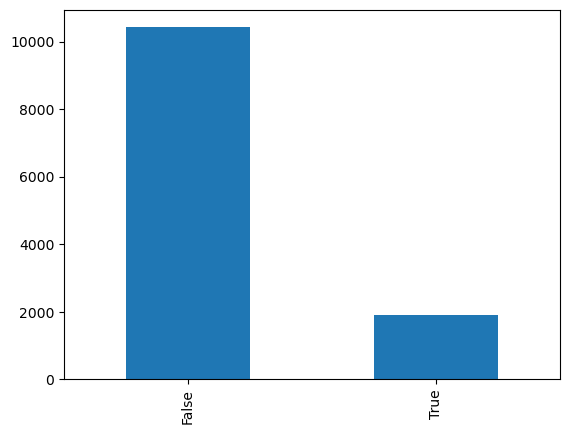

In [105]:
# plot number of data for each class label
df.Revenue.value_counts().plot.bar()
plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [106]:
# identify and handle nan values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [107]:
nonzero_mean = df.Informational_Duration[ df.Informational_Duration != 0 ].mean()
nonzero_mean

176.73374904317075

In [108]:
df.Informational_Duration.replace(to_replace = 0, value = nonzero_mean, inplace=True)
df.Informational_Duration

0        176.733749
1        176.733749
2        176.733749
3        176.733749
4        176.733749
            ...    
12325    176.733749
12326    176.733749
12327    176.733749
12328    176.733749
12329    176.733749
Name: Informational_Duration, Length: 12330, dtype: float64

In [109]:
# categorical encoding and one hot encoding
pd.get_dummies(df.VisitorType)

,New_Visitor,Other,Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
12325,0,0,1
12326,0,0,1
12327,0,0,1
12328,0,0,1


## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [125]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

df['Month'] = df['Month'].astype('category').cat.codes
df['VisitorType'] = df['VisitorType'].astype('category').cat.codes

X = df.loc[:, 'Administrative':'Weekend']
y = df.loc[:,'Revenue']

In [126]:
# train test split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number? 

In [127]:
df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x==True else -1)
df['Revenue'].value_counts()

-1    10422
 1     1908
Name: Revenue, dtype: int64

In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [129]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
print(f'MSE on training set = {mean_squared_error(y_train, y_pred)}')
y_pred = model.predict(x_test)
print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')

MSE on training set = 0.36470480370488795
MSE on validation set = 0.43043444988617163


## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting `cumulative explained variance ratio`
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

In [130]:
# plot datapoints in 2 dimensions using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(X_train)
pca.transform(X_train)

array([[-6.66945114e+02, -5.73182929e+01,  1.51638391e+01, ...,
        -8.73191640e-02, -4.78073161e-02, -3.97117707e-03],
       [ 2.29792192e+03,  5.31295635e+00, -4.94703773e+01, ...,
        -2.08663256e-02,  8.86785475e-03, -1.68816820e-04],
       [ 8.02624888e+03, -2.71426009e+02, -3.47823526e+01, ...,
        -7.78717186e-02,  4.38891921e-02,  1.29770484e-02],
       ...,
       [ 7.02339035e+03, -5.08223425e+00, -1.49752998e+02, ...,
        -2.16968219e-02,  4.98472034e-02,  1.01499175e-02],
       [-8.62966808e+02, -5.04201397e+01,  1.70522213e+01, ...,
        -1.22116904e-01, -6.46651583e-02, -1.23217987e-02],
       [ 5.37418079e+02, -5.48759406e+01, -2.41373131e+00, ...,
        -7.04781269e-02, -1.31572120e-02,  4.56588964e-03]])

In [131]:
pca.transform(x_test)

array([[ 1.90639732e+03, -1.49015707e+02, -1.33907198e+01, ...,
        -9.80097092e-02, -9.36819992e-03,  8.22548393e-03],
       [ 6.84794172e+03, -1.00558418e+02,  3.87215807e+02, ...,
         6.06240756e-02,  3.96519746e-02,  5.21909832e-03],
       [ 4.11044175e+02,  9.00812427e+01, -1.49179388e+01, ...,
        -4.39878423e-02,  8.95505282e-03, -1.32245716e-03],
       ...,
       [ 2.65690665e+02,  2.52908726e+02,  6.99952716e+02, ...,
         7.41094369e-03, -1.31559908e-02, -8.52754107e-03],
       [ 2.70035508e+03, -1.25165412e+02, -1.66854796e+02, ...,
        -9.96048853e-02, -1.40953900e-03, -1.58360728e-04],
       [ 1.67891249e+03, -1.19366576e+02, -1.29698680e+01, ...,
         1.86661663e-02,  2.08446645e-02, -1.79990572e-03]])

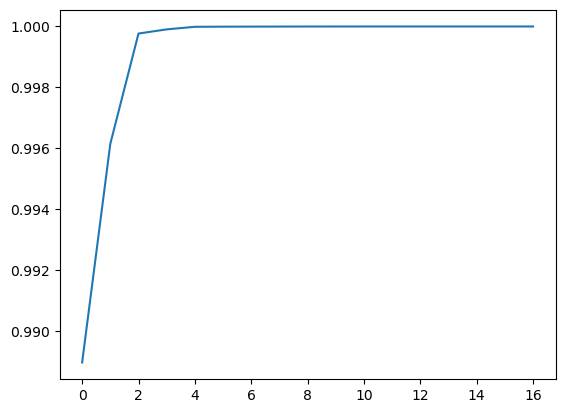

In [134]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [137]:
n_pca = PCA(n_components=2)
n_pca.fit(X_train)
n_pca.transform(X_train)

array([[-6.66945114e+02, -5.73182929e+01],
       [ 2.29792192e+03,  5.31295635e+00],
       [ 8.02624888e+03, -2.71426009e+02],
       ...,
       [ 7.02339035e+03, -5.08223425e+00],
       [-8.62966808e+02, -5.04201397e+01],
       [ 5.37418079e+02, -5.48759406e+01]])

In [139]:
n_pca.transform(x_test)

array([[1906.39731821, -149.01570658],
       [6847.94172042, -100.55841829],
       [ 411.04417502,   90.08124269],
       ...,
       [ 265.69066501,  252.90872596],
       [2700.35507543, -125.1654124 ],
       [1678.91249214, -119.36657559]])

In [11]:
# Choose the best number of dimensions for PCA

In [12]:
# Apply pca

## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.

In [13]:
# import libriary for SMOTE

In [14]:
# Apply SMOTE

In [15]:
# plot number of data for each class

## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers. 
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [16]:
# Import Necessary libraries

In [17]:
# Train classifiers 

In [18]:
# bar plot for scores

## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [19]:
# import necessary Libraries

In [20]:
# train the best model again and evaluate it on test data

In [21]:
# classification report

In [22]:
# confusion matrix

### Referances

- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
- [classification](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623)
- [dimensionality reduction (Wikipedia)](https://en.wikipedia.org/wiki/Dimensionality_reduction)